In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as patches
import ast

In [2]:
data = pd.read_csv('./labeled_data_Mahmoud.csv') #Replace with your csv file 
data.head()

,file_name,character,order,top_left,bottom_right
0,./data\CMC_CCM_2018_01_30_23_14_21_55860660845...,5,1,"(855.0, 787.0)","(906.0, 820.0)"
1,./data\CMC_CCM_2018_01_30_23_14_21_55860660845...,5,2,"(855.0, 755.0)","(906.0, 786.0)"
2,./data\CMC_CCM_2018_01_30_23_14_21_55860660845...,8,3,"(851.0, 720.0)","(907.0, 750.0)"
3,./data\CMC_CCM_2018_01_30_23_14_21_55860660845...,6,4,"(847.0, 684.0)","(904.0, 717.0)"
4,./data\CMC_CCM_2018_01_30_23_14_21_55860660845...,0,5,"(845.0, 660.0)","(903.0, 685.0)"


## One image per line

We transform the csv file to have one image per line and for each line we have information about the 11 characters.

In [3]:
transformed_df = pd.DataFrame()
# Group by 'file_name' and then iterate over each group
for file_name, group in data.groupby('file_name'):
    # Create a new entry for the file
    new_entry = {'file_name': file_name}
    
    # Iterate over each row in the group to populate the new entry
    for _, row in group.iterrows():
        order = int(row['order'])
        # Update the new entry with character, top_left, and bottom_right information
        new_entry[f'character {order}'] = row['character']
        new_entry[f'top_left {order}'] = row['top_left']
        new_entry[f'bottom_right {order}'] = row['bottom_right']

    transformed_df = transformed_df.append(new_entry, ignore_index=True)

In [4]:
transformed_df.head()

,file_name,character 1,top_left 1,bottom_right 1,character 2,top_left 2,bottom_right 2,character 3,top_left 3,bottom_right 3,...,bottom_right 8,character 9,top_left 9,bottom_right 9,character 10,top_left 10,bottom_right 10,character 11,top_left 11,bottom_right 11
0,./data\CMC_CCM_2018_01_30_23_14_21_55860660845...,5,"(855.0, 787.0)","(906.0, 820.0)",5,"(855.0, 755.0)","(906.0, 786.0)",8,"(851.0, 720.0)","(907.0, 750.0)",...,"(902.0, 555.0)",8,"(841.0, 487.0)","(898.0, 521.0)",4,"(841.0, 459.0)","(898.0, 487.0)",5,"(835.0, 418.0)","(893.0, 453.0)"
1,./data\CMC_CCM_2018_01_30_23_14_47_55860630974...,5,"(854.0, 770.0)","(903.0, 806.0)",5,"(857.0, 737.0)","(907.0, 770.0)",8,"(859.0, 701.0)","(912.0, 735.0)",...,"(935.0, 538.0)",9,"(878.0, 474.0)","(934.0, 511.0)",7,"(879.0, 436.0)","(935.0, 477.0)",4,"(886.0, 410.0)","(941.0, 442.0)"
2,./data\CMC_CCM_2018_01_30_23_15_12_55860610863...,5,"(836.0, 772.0)","(892.0, 812.0)",5,"(836.0, 742.0)","(893.0, 774.0)",8,"(838.0, 704.0)","(895.0, 737.0)",...,"(881.0, 535.0)",8,"(824.0, 466.0)","(883.0, 495.0)",6,"(830.0, 436.0)","(888.0, 466.0)",3,"(826.0, 403.0)","(883.0, 438.0)"
3,./data\CMC_CCM_2018_01_30_23_15_38_558606408CX...,5,"(848.0, 759.0)","(905.0, 802.0)",5,"(844.0, 726.0)","(901.0, 759.0)",8,"(845.0, 689.0)","(902.0, 726.0)",...,"(901.0, 531.0)",8,"(848.0, 467.0)","(904.0, 497.0)",C,"(845.0, 425.0)","(904.0, 451.0)",X,"(845.0, 388.0)","(903.0, 425.0)"
4,./data\CMC_CCM_2018_01_30_23_16_55_558606209C1...,5,"(834.0, 785.0)","(889.0, 822.0)",5,"(834.0, 749.0)","(888.0, 788.0)",8,"(835.0, 715.0)","(889.0, 749.0)",...,"(884.0, 545.0)",9,"(826.0, 484.0)","(882.0, 515.0)",C,"(828.0, 445.0)","(884.0, 476.0)",1,"(824.0, 416.0)","(882.0, 441.0)"


## Choose which image to plot, by modifying this number to select another image

In [7]:
n = 5

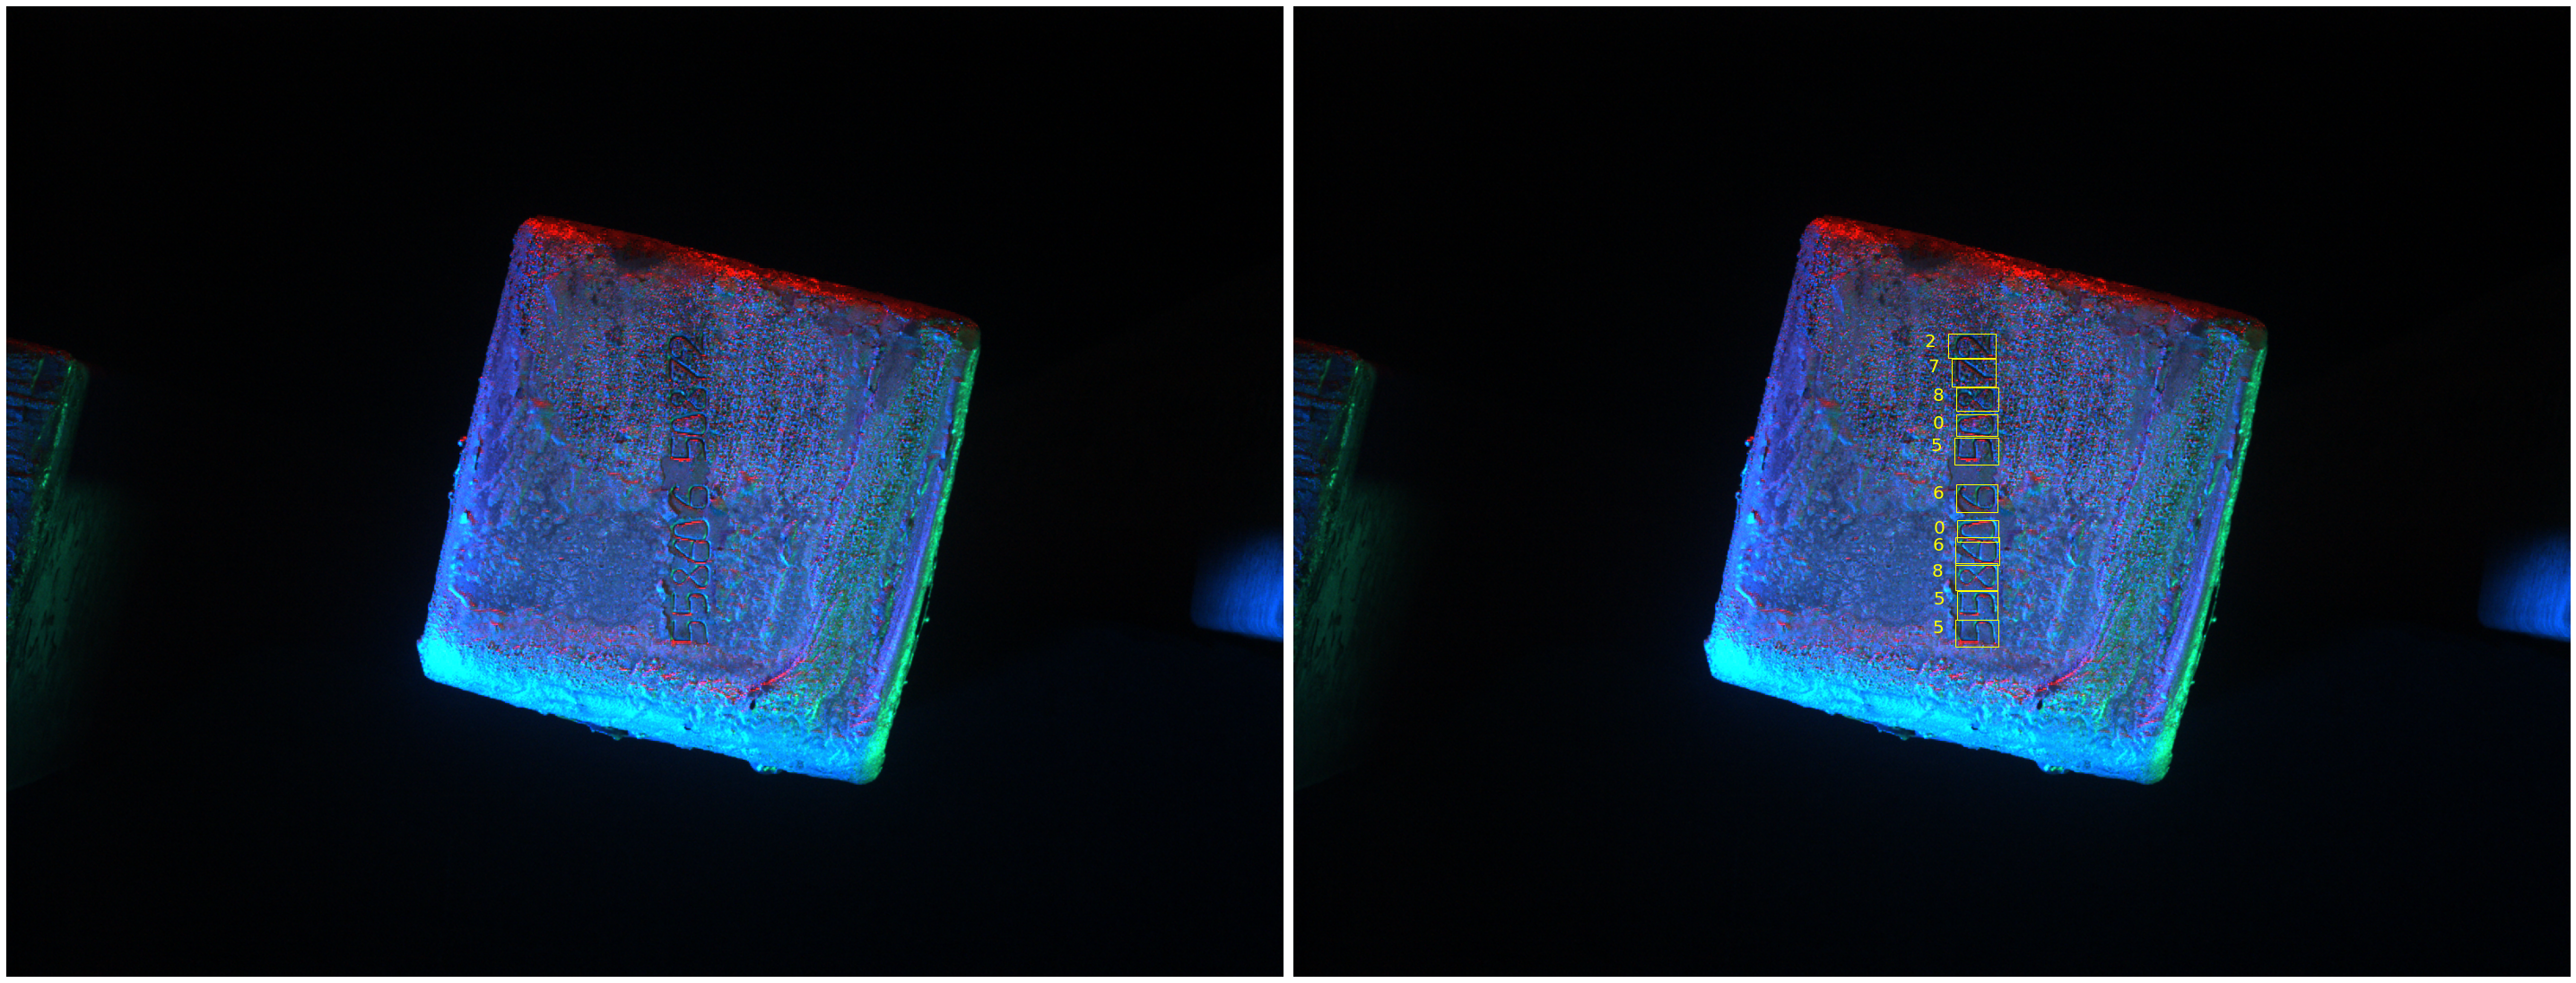

In [8]:
row = transformed_df.iloc[n]

# Open the image file
original_img = Image.open(row['file_name'])

# two subplots: one for the original image and one for the annotated image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(40, 30))  

# Display the original image in the first subplot
ax1.imshow(original_img)
ax1.axis('off')

# Display the original image in the second subplot, which will be annotated
ax2.imshow(original_img)

# Draw each character's bounding box and annotate on the second subplot
for i in range(1, 12):  # Adjust the range if there are more or fewer characters
    character_key = f'character {i}'
    top_left_key = f'top_left {i}'
    bottom_right_key = f'bottom_right {i}'

    # Check if the character information is present
    if character_key in row and pd.notna(row[character_key]):
        # Convert the string representation of the tuple back to an actual tuple if necessary
        top_left = ast.literal_eval(row[top_left_key])
        bottom_right = ast.literal_eval(row[bottom_right_key])

        # Perform arithmetic on the coordinates
        width = bottom_right[0] - top_left[0]
        height = bottom_right[1] - top_left[1]

        # Create a Rectangle patch
        rect = patches.Rectangle(top_left, width, height, linewidth=1, edgecolor='yellow', facecolor='none')
        
        # Add the rectangle to the second subplot
        ax2.add_patch(rect)
        
        # Calculate the position for the text annotation to be on the left of the bounding box
        offset = 30  # Modify this value to offset the label from bounding box
        text_x = max(top_left[0] - offset, 0) 
        text_y = top_left[1]

        # Annotate the character with a larger font and yellow color on the second subplot
        ax2.text(text_x, text_y, row[character_key], fontsize=20, color='yellow', verticalalignment='top')

ax2.axis('off')  

# Show the plot with both the original and annotated images
plt.tight_layout()
plt.show()

## Double Click on the image to zoom in